# 1. Chargement des données : "Caliornia Housing" dataset

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [57]:
housing = pd.read_csv('datasets/housing.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("housing's shape : ", housing.shape)
# Affichage des 10 premières lignes
housing.head()

housing's shape :  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. Exploration et visualisation des données

In [58]:
# affichage d'informations sur les données 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
# dataset consiste de 200640 quartiers et de 10 attributs :
## `longitude` et `latitude`: coordonnées géograophiques            
## `housing_median_age`  : âge médian des logements
## `total_rooms` : nb total de pièces      
## `total_bedrooms` : nb total de chambres    
## `population`          
## `households` : nb de foyers       
## `median_income` : revenu médian      
## `median_house_value`  : valeur médiane des maisons (la variable de sortie à prédire)
## `ocean_proximity` : proximité de l'océan

#`total_bedrooms` : 20433 Non-NulL parmi 20640 observations ==> 207 données manquantes
missing = housing.isna().sum()
print(missing)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [60]:
# tous les attributs sont numériques (float64) sauf `ocean_proximity` :

# Print numerical features
num_features = housing.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = housing.select_dtypes(include=[np.object]).columns
print(cat_features)

#`ocean_proximity` : attribut catégorique (object à encoder ultérieurement) contenant les catégories suivantes :
housing["ocean_proximity"].value_counts()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [61]:
# affichage d'informations statistiques sur les données
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


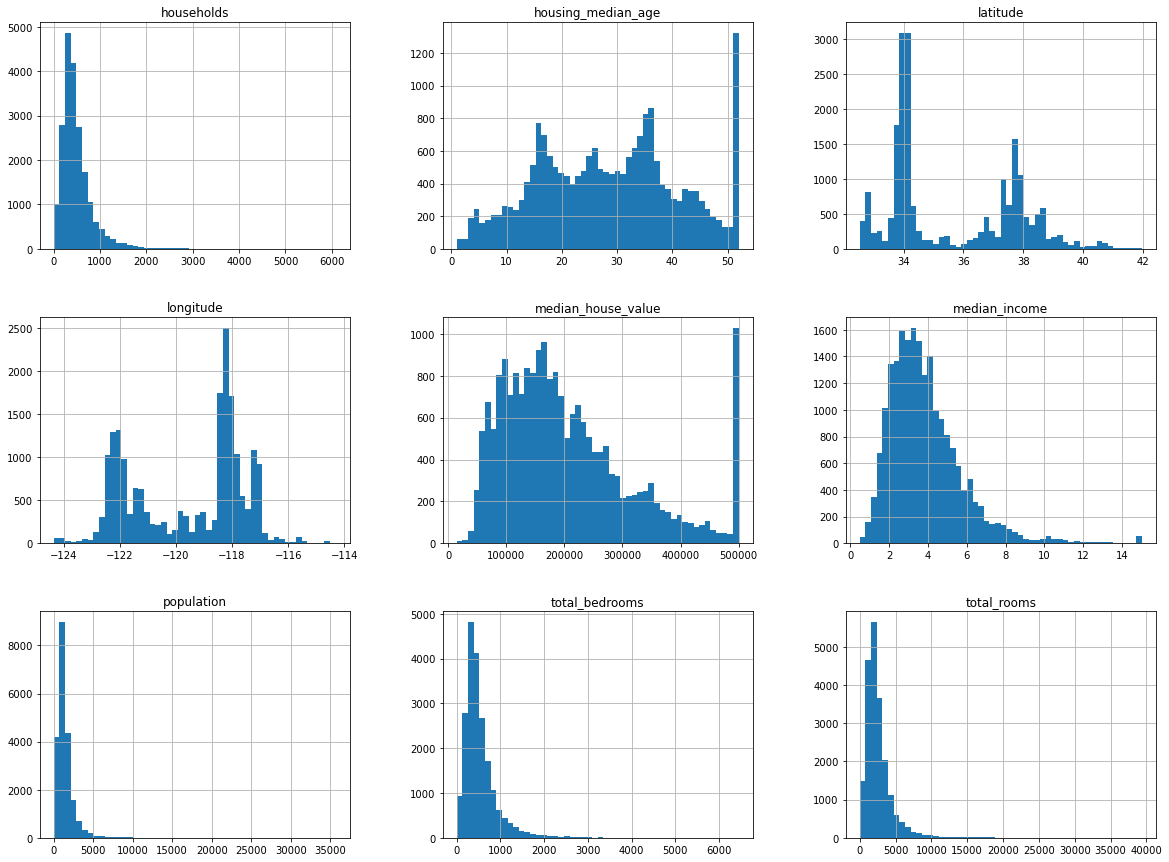

In [62]:
# Visualisation des histogrammes des variables numériques
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
# Calculer les coefficients `skewness` des attributs
skewness = housing.skew()
print(skewness)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


In [64]:
# Calculer les coefficients `skewness` des attributs
kurtosis = housing.kurtosis()
print(kurtosis)

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64


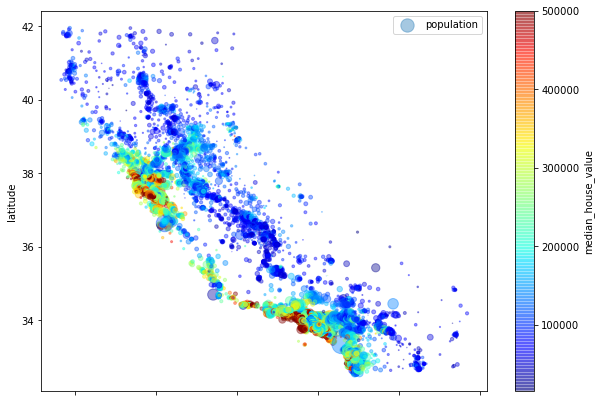

In [65]:
# Visualisation des données pour extraire les informations (insights)
# `alpha' : densité des points
# `s` = taille d'un point qui est propotionnelle à 'population'
# 'c' = couleur d'un point  qui est propotionnel à 'median_house_value' (colormap = 'jet' : du bleu au rouge)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()
# ==> Cette image montre que `median_house_value` est lié à l'emplacement (`ocean_proximity` : 
# plus près de la mer-> logement plus cher) et à `population`.
# ==> La relation entre `population` et `median_house_value` n'est pas si évidente. Explorons leur corrélation !

In [66]:
# La corrélation entre variables aléatoires est une notion de liaison qui contredit leur indépendance. 
# La varation d'une variable aléatoire influe sur les variations des autres variables en cas de corrélation.
# Calculons alors la corrélation entre `population` et `median_house_value` :
housing[['population', 'median_house_value']].corr()
# => corr=-0.02465 : elles sont faiblement corrélées 
# => coor<0 : elles sont inversement propotionnelles ex. Pour un quartier populaire, les logements sont moins chers

,population,median_house_value
population,1.00000,-0.02465
median_house_value,-0.02465,1.00000


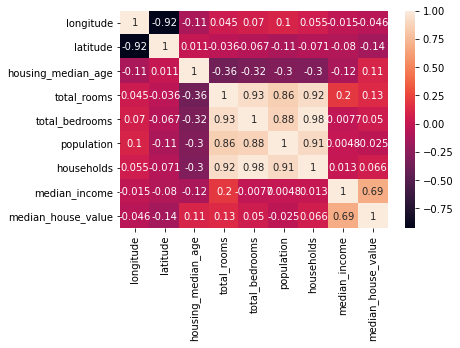

In [67]:
# Corrélation entre les variables
# Étant donné que l'ensemble de données n'est pas trop grand, nous pouvons facilement calculer le coefficient 
# de corrélation de chaque paire de variables ==> matrice 10 x 10 symétrique
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot=True)

In [68]:
# Corrélation de `'median_house_value` avec les autres variables
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

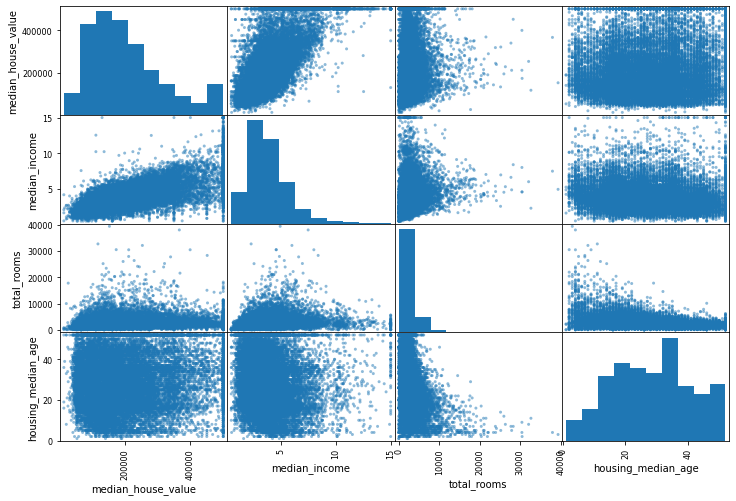

In [69]:
# Prenons les 3 premiers attibuts les plus corrélés avec 'median_house_value'
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

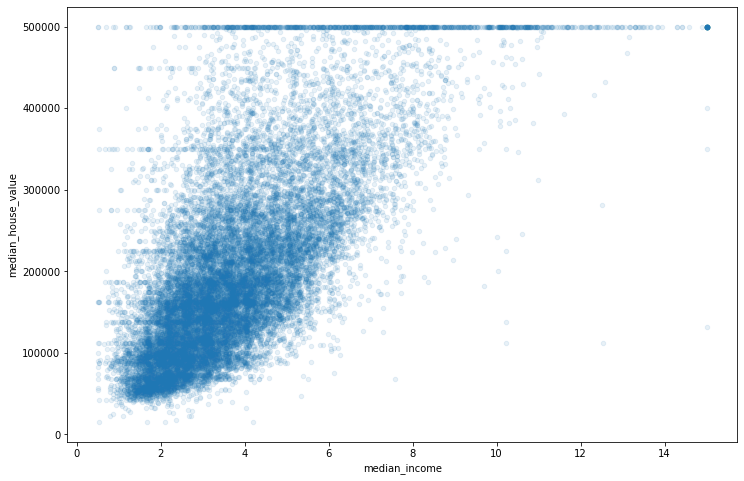

In [71]:
# ==> L'attribut le plus important dans la prédiction de `median_house_value` est `median_income`
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

# 3. Préparation des données

In [72]:
#Supprimer les lignes dupliquées
housing = housing.drop_duplicates()

# Feature Engineering : Combinaison d'attributs
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

housing.drop(['total_bedrooms'], axis=1, inplace=True)

# vérifiant avec la corrélation
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [73]:
# Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn :
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1) # input variables (X est une dataframe)
y = housing["median_house_value"].to_numpy() # output variable (y est un vecteur)

# `stratify`  permet de s'assurer que les variables y sont équitablement réparties entre les deux ensembles train et test.
bins = np.linspace(y.min(), y.max(), 100)
y_binned = np.digitize(y, bins)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y_binned,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (16512, 11) X_test: (4128, 11)


In [74]:
# Nettoyage des données : attribuer des valeurs aux données manquantes
#`total_bedrooms` contient des valeurs manquantes (NULL), nous avons 3 options :

#   + Supprimer les lignes contenant ces valeurs manquantes :
#   housing.dropna(subset='total_bedrooms')

#   + Supprimer l'attribut (colonne) `total_bedrooms` :
# housing.drop('total_bedrooms', axis=1)
     
#   + Affecter à ces données manquantes une certaine valeur (0, moyenne, médiane, etc.)

## Exemple :
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(strategy="mean")
inputer.fit_transform([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [75]:
# Feature scaling : StandardScaler : moyenne = 0 et écart type = 1
from sklearn.preprocessing import StandardScaler
# Génerer une matrice (3x3) avec des valeurs entre 1 et 10
data = np.random.randint(1, 10, (3, 3))
print(data)

scaler = StandardScaler().fit(data)
print("\nmean", scaler.mean_)

data_scaled = scaler.transform(data)
print(data_scaled)

# Nouvelle moyenne 0. et Nouveau écart type 1.
print("\nMoy:", data_scaled.mean(), "Std:", data_scaled.std())

[[2 1 1]
 [1 6 1]
 [1 2 2]]

mean [1.33333333 3.         1.33333333]
[[ 1.41421356 -0.9258201  -0.70710678]
 [-0.70710678  1.38873015 -0.70710678]
 [-0.70710678 -0.46291005  1.41421356]]

Moy: 1.2335811384723962e-16 Std: 0.9999999999999999


In [76]:
# Encodage des variables catégoriques
from sklearn.preprocessing import OneHotEncoder

data = [["ROUGE"], ["ROUGE"], ["JAUNE"], ["VERT"], ["JAUNE"]]
encoder = OneHotEncoder().fit(data)
data_hot = encoder.transform(data).toarray()

print(data_hot)
print(encoder.categories_)
del data #suppression de data

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[array(['JAUNE', 'ROUGE', 'VERT'], dtype=object)]


In [77]:
# Construire un `pipeline de pré-traitement` qui (1) traite  les valeurs manquantes, transforme les 
# distributions et met en échelle des variables numériques et (2) encode les variable catégoriques

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Print numerical features
num_features = X_train.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = X_train.select_dtypes(include=[np.object]).columns
print(cat_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [78]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])

# le full_pipeline applique num_pipeline aux variables numériques et encode les variables catégoriques
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])

# Apprendre full_pipeline sur training data
full_pipeline = full_pipeline.fit(X_train)
import joblib
joblib.dump(full_pipeline,"dataPreparation.pkl")

# Appliquer sur les training data et test data
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)


 X_train: (16512, 15) X_test: (4128, 15)


In [79]:
# sauvgarder les données préparées
print(X_train[0,:])
features = num_features.to_numpy()
features = np.concatenate((features, ['ocean_1', 'ocean_2', 'ocean_3', 'ocean_4', 'ocean_5', 'median_house_value']), axis=0)
print(features)

[-1.30857243  1.05876908  0.82883368 -1.18819343 -1.40850033 -0.8230231
 -0.24550082 -1.26183905  1.32210962 -2.15552052  0.          0.
  0.          1.          0.        ]
['longitude' 'latitude' 'housing_median_age' 'total_rooms' 'population'
 'households' 'median_income' 'rooms_per_household' 'bedrooms_per_room'
 'population_per_household' 'ocean_1' 'ocean_2' 'ocean_3' 'ocean_4'
 'ocean_5' 'median_house_value']


In [80]:
# saugarder dans un fichier CSV les données préparées représentées dataframe
print(np.shape(X_train))
print(np.shape(y_train))
df_train = pd.DataFrame(np.concatenate((X_train, y_train[:, np.newaxis]), axis=1), columns=features)
df_train.to_csv('datasets/housing_train.csv', index=False)
df_train.head()

(16512, 15)
(16512,)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-1.308572,1.058769,0.828834,-1.188193,-1.408500,-0.823023,-0.245501,-1.261839,1.322110,-2.155521,0.0,0.0,0.0,1.0,0.0,237500.0
1,0.567871,-0.635401,1.048089,0.058527,-0.136146,0.127886,-0.193363,-0.146672,0.156685,-0.701974,1.0,0.0,0.0,0.0,0.0,250000.0
2,1.382643,-1.582079,-0.736547,1.393413,1.388602,1.565610,-0.393989,-0.216869,-0.088894,-0.287003,1.0,0.0,0.0,0.0,0.0,135700.0
3,-1.185122,0.890334,-0.243567,0.579701,0.367176,0.547581,0.833637,0.152921,-0.305451,-0.402009,1.0,0.0,0.0,0.0,0.0,287600.0
4,-0.172830,0.660399,1.406965,-0.671689,-0.045317,-0.356069,-1.907723,-0.961184,1.693040,0.888965,0.0,1.0,0.0,0.0,0.0,49600.0


In [81]:
# sauvgarder dans un fichier CSV les données préparées représentées dataframe
print(np.shape(X_test))
print(np.shape(y_test))
df_test = pd.DataFrame(np.concatenate((X_test, y_test[:, np.newaxis]), axis=1), columns=features)
df_test.to_csv('datasets/housing_test.csv', index=False)
df_test.head()

(4128, 15)
(4128,)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-0.172830,0.684426,-0.736547,-0.482004,-0.302572,-0.120655,-1.726629,-1.045449,1.449291,-0.489414,0.0,1.0,0.0,0.0,0.0,47500.0
1,-0.123450,-0.488583,-0.084457,0.830651,0.568531,0.908358,0.315593,-0.080205,0.010182,-0.783944,0.0,0.0,0.0,0.0,1.0,395100.0
2,0.222210,0.035660,-0.084457,1.146837,0.953889,1.206860,-0.211090,-0.006154,-0.176556,-0.510929,0.0,1.0,0.0,0.0,0.0,85000.0
3,0.617251,-0.591933,1.120496,-0.566029,-0.487707,-0.459440,0.586153,-0.324347,0.479530,-0.050951,1.0,0.0,0.0,0.0,0.0,209200.0
4,0.543181,-0.756144,-0.993750,-3.363673,-3.809589,-3.937811,1.732088,3.803353,-3.332427,1.515396,1.0,0.0,0.0,0.0,0.0,500001.0
